In [66]:
! pip install prettytable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
def show_plots(learning_rate, lsttests, epochs, metric, has_500=True):
    x = np.arange(1, epochs + 1)
    plt.plot(x, lsttests[0], color='#FFAA40', label='N = 50')
    plt.plot(x, lsttests[1], color='#33CCCC', label='N = 100', linestyle='--', linewidth=1.5)
    plt.plot(x, lsttests[2], color='red', label='N = 200')
    plt.plot(x, lsttests[3], color='blue', label='N = 400', linestyle='--', linewidth=1.5)
    
    if has_500:
        plt.plot(x, lsttests[4], color='green', label='N = 500')
    
    plt.legend(fontsize=12)
    plt.ylabel(metric)
    plt.xlabel("Epoch")
    plt.grid()
    plt.xticks(np.arange(0, epochs + 1, 5))
    plt.title(f"Learning rate = {learning_rate}", fontsize=14)
    
    plt.show()

In [3]:
def load_lsttest(learning_rate, embed, has_500=True, m=""):
    lsttest = []
    lsttest.append(np.load(f"train_metric_values/{embed}/{learning_rate}-50{m}.npy"))
    lsttest.append(np.load(f"train_metric_values/{embed}/{learning_rate}-100{m}.npy"))
    lsttest.append(np.load(f"train_metric_values/{embed}/{learning_rate}-200{m}.npy"))
    lsttest.append(np.load(f"train_metric_values/{embed}/{learning_rate}-400{m}.npy"))
    if has_500:
        lsttest.append(np.load(f"train_metric_values/{embed}/{learning_rate}-500.npy"))
    return lsttest

In [92]:
def get_best_results(learning_rates, embed, has_500=True, m=""):
    d = {}
    for l in learning_rates:
        d[l] = []
        d[l].append(round(max(np.load(f"train_metric_values/{embed}/{l}-50{m}.npy")), 4))
        d[l].append(round(max(np.load(f"train_metric_values/{embed}/{l}-100{m}.npy")), 4))
        d[l].append(round(max(np.load(f"train_metric_values/{embed}/{l}-200{m}.npy")), 4))
        d[l].append(round(max(np.load(f"train_metric_values/{embed}/{l}-400{m}.npy")), 4))
        if has_500:
            d[l].append(round(max(np.load(f"train_metric_values/{embed}/{l}-500.npy")), 4))
    return d

## arXiv doc2vec

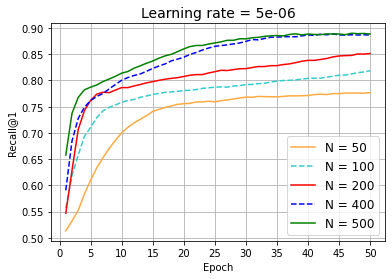

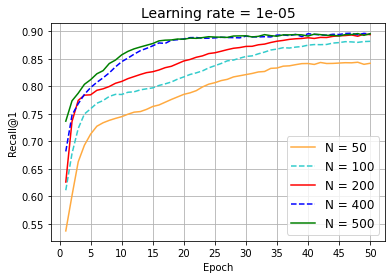

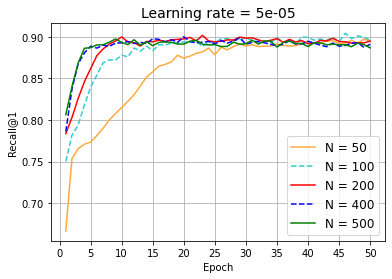

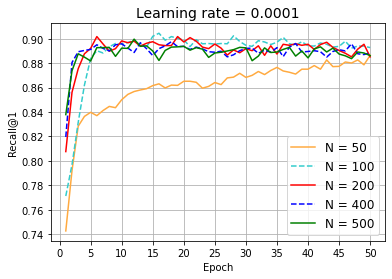

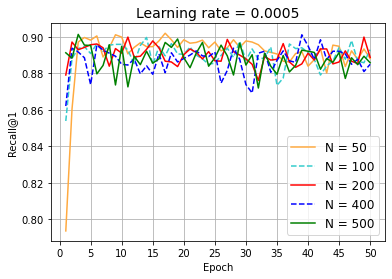

In [58]:
learning_rates = ["5e-06", "1e-05", "5e-05", "0.0001", "0.0005"]
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'arxiv_doc2vec'), epochs=50, metric="Recall@1")

In [81]:
best_results = get_best_results(learning_rates, "arxiv_doc2vec")
table = PrettyTable(["", "50", "100", "200", "400", "500"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results arXiv DocVec")
print(table)

Best results arXiv DocVec
+--------+--------+--------+--------+--------+--------+
|        |   50   |  100   |  200   |  400   |  500   |
+--------+--------+--------+--------+--------+--------+
| 5e-06  | 0.7769 | 0.8185 | 0.8513 | 0.8888 |  0.89  |
| 1e-05  | 0.844  | 0.882  | 0.8951 | 0.8968 | 0.8961 |
| 5e-05  | 0.8972 | 0.9043 | 0.9018 | 0.9001 | 0.8974 |
| 0.0001 | 0.8865 | 0.9045 | 0.9018 | 0.8976 | 0.8997 |
| 0.0005 | 0.902  | 0.8997 | 0.8999 | 0.9012 | 0.9014 |
+--------+--------+--------+--------+--------+--------+


## arxiv fasttext

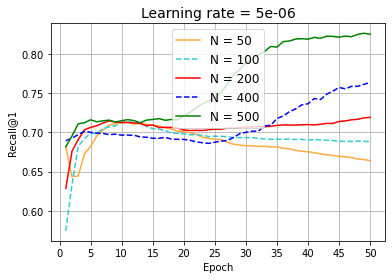

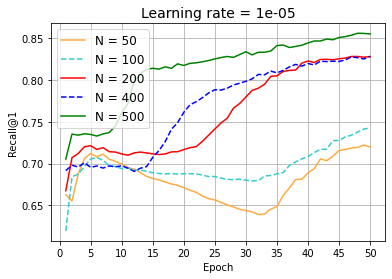

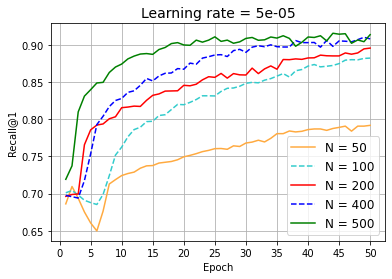

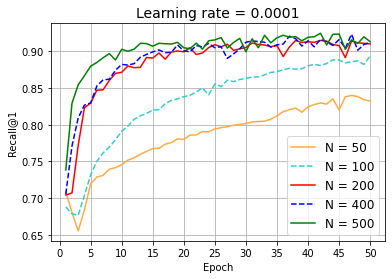

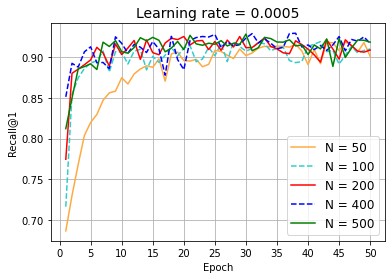

In [65]:
learning_rates = ["5e-06", "1e-05", "5e-05", "0.0001", "0.0005"]
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'arxiv_fasttext'), epochs=50, metric="Recall@1")

In [82]:
best_results = get_best_results(learning_rates, "arxiv_fasttext")
table = PrettyTable(["", "50", "100", "200", "400", "500"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results arXiv FastText")
print(table)

Best results arXiv FastText
+--------+--------+--------+--------+--------+--------+
|        |   50   |  100   |  200   |  400   |  500   |
+--------+--------+--------+--------+--------+--------+
| 5e-06  | 0.7128 | 0.7134 | 0.7193 | 0.7637 | 0.8266 |
| 1e-05  | 0.7223 | 0.7425 | 0.8281 | 0.8283 | 0.8559 |
| 5e-05  | 0.7917 | 0.8822 | 0.8956 | 0.9102 | 0.9156 |
| 0.0001 | 0.8399 | 0.8938 | 0.9148 | 0.9234 | 0.9247 |
| 0.0005 | 0.9182 | 0.9186 | 0.9249 | 0.9289 | 0.9278 |
+--------+--------+--------+--------+--------+--------+


## mind doc2vec

Recall@K


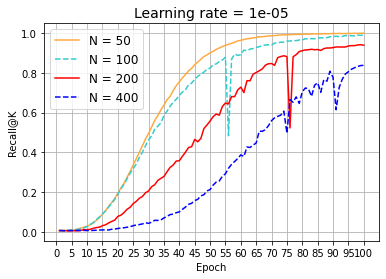

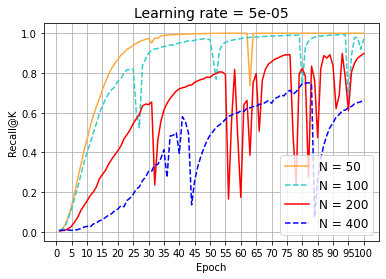

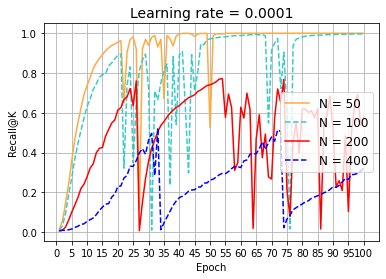

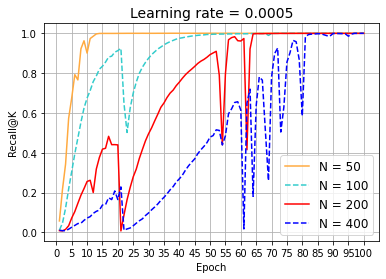

In [93]:
learning_rates = ["1e-05", "5e-05", "0.0001", "0.0005"]
print("Recall@K")
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'mind_doc2vec', has_500=False, m="-m1"), 
               epochs=100, metric="Recall@K", has_500=False)

In [101]:
best_results = get_best_results(learning_rates, "mind_doc2vec", m="-m1", has_500=False)
table = PrettyTable(["", "50", "100", "200", "400"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results MIND Doc2Vec Recall@K")
print(table)

Best results MIND Doc2Vec Recall@K
+--------+--------+--------+--------+--------+
|        |   50   |  100   |  200   |  400   |
+--------+--------+--------+--------+--------+
| 1e-05  | 0.9988 | 0.9912 | 0.9412 | 0.8373 |
| 5e-05  |  1.0   | 0.9932 | 0.8982 | 0.7515 |
| 0.0001 |  1.0   | 0.9973 | 0.7713 | 0.5237 |
| 0.0005 |  1.0   | 0.9998 | 0.9993 | 0.9997 |
+--------+--------+--------+--------+--------+


Average precision@K


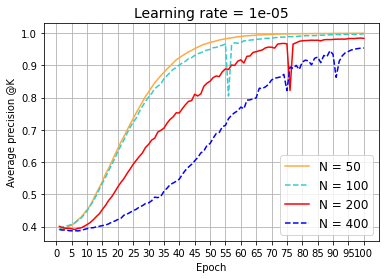

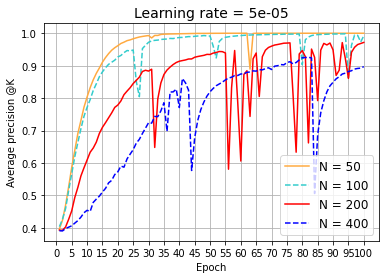

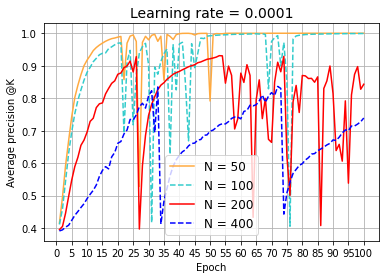

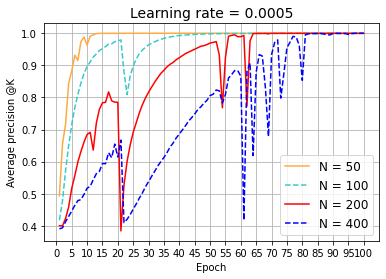

In [98]:
learning_rates = ["1e-05", "5e-05", "0.0001", "0.0005"]
print("Average precision@K")
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'mind_doc2vec', has_500=False, m="-m2"), 
               epochs=100, metric="Average precision @K", has_500=False)

In [102]:
best_results = get_best_results(learning_rates, "mind_doc2vec", m="-m2", has_500=False)
table = PrettyTable(["", "50", "100", "200", "400"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results MIND Doc2Vec - Average precision @ K")
print(table)

Best results MIND Doc2Vec - Average precision @ K
+--------+--------+--------+--------+--------+
|        |   50   |  100   |  200   |  400   |
+--------+--------+--------+--------+--------+
| 1e-05  | 0.9997 | 0.9976 | 0.9847 | 0.9539 |
| 5e-05  |  1.0   | 0.9981 | 0.9717 | 0.9258 |
| 0.0001 |  1.0   | 0.9992 | 0.931  | 0.8362 |
| 0.0005 |  1.0   | 0.9999 | 0.9997 | 0.9998 |
+--------+--------+--------+--------+--------+


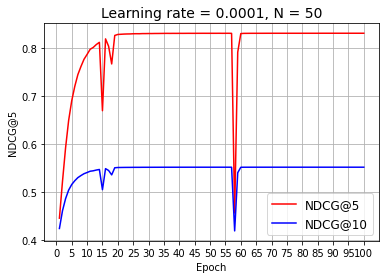

In [21]:
#NDCG@5, 10
epochs = 100

x = np.arange(1, epochs + 1)
values5 = np.load(f"train_metric_values/mind_doc2vec/0.0001-50-ndcg5.npy")
values10 = np.load(f"train_metric_values/mind_doc2vec/0.0001-50-ndcg10.npy")
plt.plot(x, values5, color='red', label='NDCG@5')
plt.plot(x, values10, color='blue', label='NDCG@10')
    
plt.legend(fontsize=12)
plt.ylabel("NDCG@5")
plt.xlabel("Epoch")
plt.grid()
plt.xticks(np.arange(0, epochs + 1, 5))
plt.title(f"Learning rate = 0.0001, N = 50", fontsize=14)
    
plt.show()

In [22]:
max(values5)

0.8306010774655753

In [23]:
max(values10)

0.5518465890758137

## mind fasttext

Recall@K


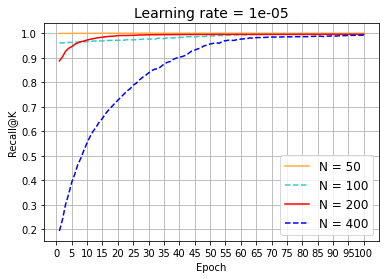

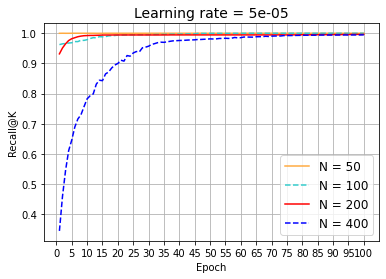

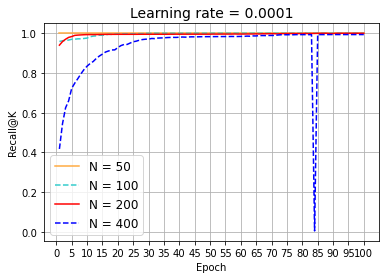

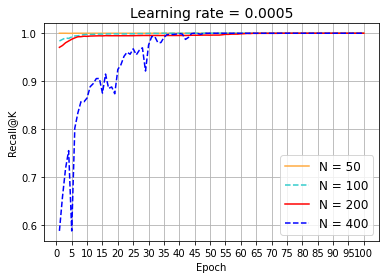

In [104]:
learning_rates = ["1e-05", "5e-05", "0.0001", "0.0005"]
print("Recall@K")
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'mind_fasttext', has_500=False, m="-m1"), 
               epochs=100, metric="Recall@K", has_500=False)

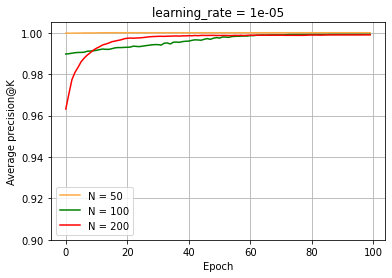

In [138]:
plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_fasttext/1e-05-50-m2.npy"), color='#FFAA40', label='N = 50')

plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_fasttext/1e-05-100-m2.npy"), color='green', 
         label='N = 100')

plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_fasttext/1e-05-200-m2.npy"), color='red', label='N = 200')


plt.ylim(0.9, 1.005)
plt.legend()
plt.title("learning_rate = 1e-05")
plt.ylabel("Average precision@K")
plt.xlabel("Epoch")

plt.grid()
plt.show()


In [106]:
best_results = get_best_results(learning_rates, "mind_fasttext", m="-m1", has_500=False)
table = PrettyTable(["", "50", "100", "200", "400"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results MIND FastText Recall@K")
print(table)

Best results MIND FastText Recall@K
+--------+-----+--------+--------+--------+
|        |  50 |  100   |  200   |  400   |
+--------+-----+--------+--------+--------+
| 1e-05  | 1.0 | 0.9967 | 0.9958 | 0.9922 |
| 5e-05  | 1.0 |  1.0   | 0.9963 | 0.9947 |
| 0.0001 | 1.0 |  1.0   | 0.9997 | 0.9933 |
| 0.0005 | 1.0 |  1.0   |  1.0   |  1.0   |
+--------+-----+--------+--------+--------+


Recall@K


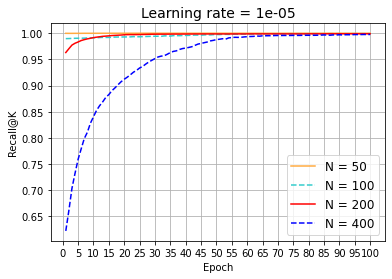

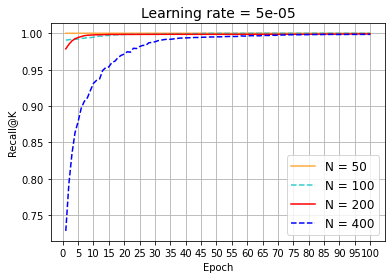

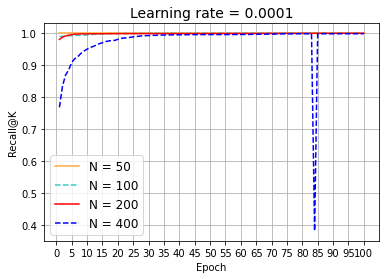

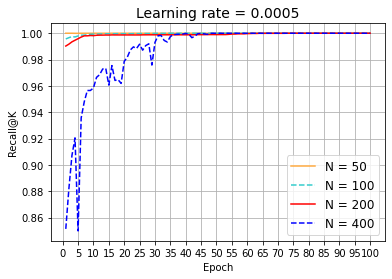

In [107]:
learning_rates = ["1e-05", "5e-05", "0.0001", "0.0005"]
print("Recall@K")
for l in learning_rates:
    show_plots(l, load_lsttest(l, 'mind_fasttext', has_500=False, m="-m2"), 
               epochs=100, metric="Recall@K", has_500=False)

In [109]:
best_results = get_best_results(learning_rates, "mind_fasttext", m="-m2", has_500=False)
table = PrettyTable(["", "50", "100", "200", "400"])

for l in best_results:
    table.add_row([l] + best_results[l])
    
print("Best results MIND FastText Average precision@K")
print(table)

Best results MIND FastText Average precision@K
+--------+-----+--------+--------+--------+
|        |  50 |  100   |  200   |  400   |
+--------+-----+--------+--------+--------+
| 1e-05  | 1.0 | 0.9992 | 0.999  | 0.9977 |
| 5e-05  | 1.0 |  1.0   | 0.9991 | 0.9985 |
| 0.0001 | 1.0 |  1.0   | 0.9999 | 0.9984 |
| 0.0005 | 1.0 |  1.0   |  1.0   |  1.0   |
+--------+-----+--------+--------+--------+


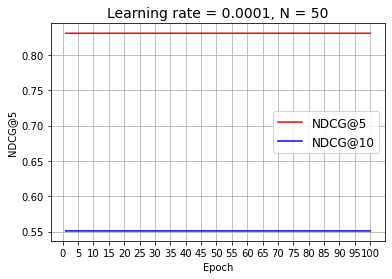

In [19]:
#NDCG@5, 10
epochs = 100

x = np.arange(1, epochs + 1)
values5 = np.load(f"train_metric_values/mind_fasttext/0.0001-50-ndcg5.npy")
values10 = np.load(f"train_metric_values/mind_fasttext/0.0001-50-ndcg10.npy")
plt.plot(x, values5, color='red', label='NDCG@5')
plt.plot(x, values10, color='blue', label='NDCG@10')
    
plt.legend(fontsize=12)
plt.ylabel("NDCG@5")
plt.xlabel("Epoch")
plt.grid()
plt.xticks(np.arange(0, epochs + 1, 5))
plt.title(f"Learning rate = 0.0001, N = 50", fontsize=14)
    
plt.show()

In [20]:
print(max(values5), max(values10))

0.8305784423229067 0.5508694076498687


## mind bert

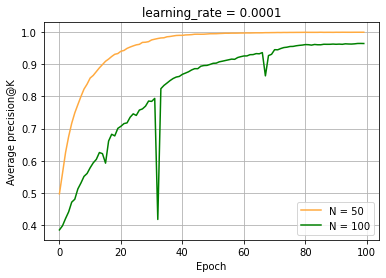

In [158]:
plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_bert/0.0001-50-m2.npy"), color='#FFAA40', label='N = 50')

plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_bert/0.0001-100-m2.npy"), color='green', 
         label='N = 100')

plt.grid()
plt.legend()
plt.title("learning_rate = 0.0001")
plt.ylabel("Average precision@K")
plt.xlabel("Epoch")
plt.show()


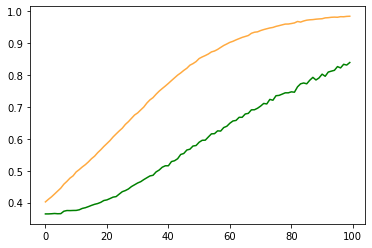

In [142]:
plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_bert/5e-06-50-m2.npy"), color='#FFAA40', label='N = 50')

plt.plot(np.arange(100), np.load(f"saved_lsttest/mind_bert/5e-06-100-m2.npy"), color='green', 
         label='N = 100')



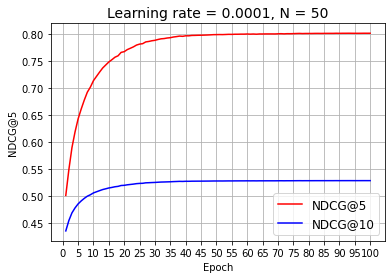

In [24]:
#NDCG@5, 10
epochs = 100

x = np.arange(1, epochs + 1)
values5 = np.load(f"train_metric_values/mind_bert/0.0001-50-ndcg5.npy")
values10 = np.load(f"train_metric_values/mind_bert/0.0001-50-ndcg10.npy")
plt.plot(x, values5, color='red', label='NDCG@5')
plt.plot(x, values10, color='blue', label='NDCG@10')
    
plt.legend(fontsize=12)
plt.ylabel("NDCG@5")
plt.xlabel("Epoch")
plt.grid()
plt.xticks(np.arange(0, epochs + 1, 5))
plt.title(f"Learning rate = 0.0001, N = 50", fontsize=14)
    
plt.show()

In [25]:
print(max(values5), max(values10))

0.801519686976912 0.5280548913869931


In [150]:
print(max(np.load(f"saved_lsttest/mind_bert/0.0001-50-m1.npy")))
print(max(np.load(f"saved_lsttest/mind_bert/0.0001-100-m1.npy")))

print(max(np.load(f"saved_lsttest/mind_bert/5e-06-50-m1.npy")))
print(max(np.load(f"saved_lsttest/mind_bert/5e-06-100-m1.npy")))

0.9988333333333334
0.8865
0.9463333333333334
0.5566666666666666


In [152]:
print(max(np.load(f"saved_lsttest/mind_bert/0.0001-50-m2.npy")))
print(max(np.load(f"saved_lsttest/mind_bert/0.0001-100-m2.npy")))

print(max(np.load(f"saved_lsttest/mind_bert/5e-06-50-m2.npy")))
print(max(np.load(f"saved_lsttest/mind_bert/5e-06-100-m2.npy")))

0.9995583333333335
0.9647420634920664
0.9838071428571449
0.8388615079365119
